<a href="https://colab.research.google.com/github/RakeshSharma21/Sessions_Notebook/blob/main/Advanced_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

- X==> Feature in the dataset
- y==> Ground Truth
- y_pred ==> prediction from model
- y_pred = mX+c
- m==> Slope/weight/cofficient
- c==> intercept / bias

In [3]:
# create dataset for linear regression
import numpy as np
datapoints =500
varition=5
x_values = np.linspace(25,50,datapoints) # values lie between 25 to 50 and equally spaced ( 500 datapoints)
y_values =[]

for i in range(datapoints):
  y_value = 1.2* x_values[i]-10
  y_value_random = np.random.normal(y_value,varition)
  y_values.append(y_value_random)


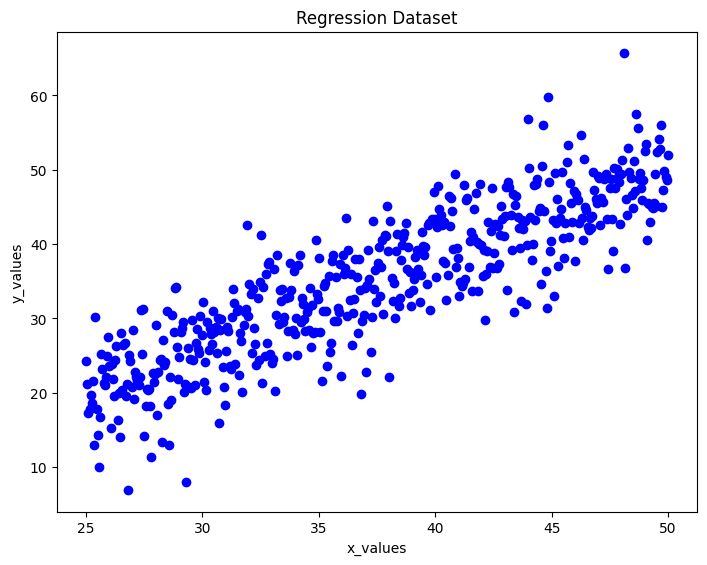

In [7]:
# visualise the created data
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x_values,y_values,color='b')
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_title('Regression Dataset')
plt.show()

#### fitting a linear regression model

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_values.reshape(-1,1),y_values)
y_pred = model.predict(x_values.reshape(-1,1))

In [11]:
## computing mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_values,y_pred)
print(f' Mean squared error for linear regression is {mse}')

 Mean squared error for linear regression is 25.36131000627421


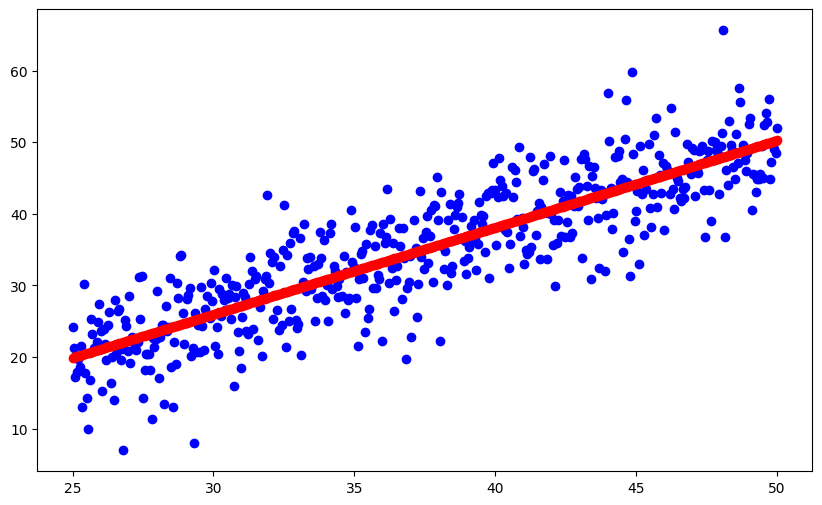

In [12]:
## plot the results
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,label="Data point", c="b")
plt.scatter(x_values,y_pred,label='Linear Regression prediction',c='r')

### When data is non-linear

In [13]:
# create non-linear data
X = np.linspace(0,10,100)
y_true =0.5* X**3 - 2* X**2 + 3*X + np.random.normal(0,2,100)

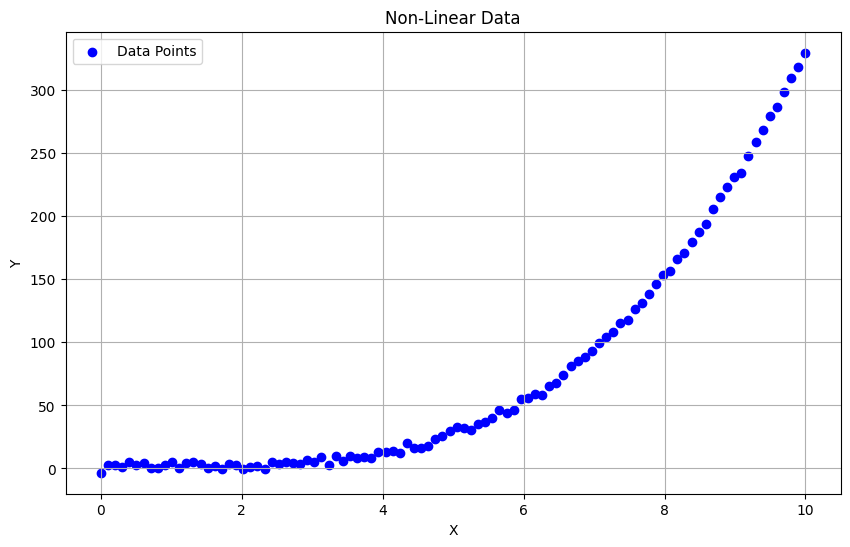

In [15]:
# plot the non-linear data
plt.figure(figsize=(10,6))
plt.scatter(X,y_true,label='Data Points',c='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Data')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
## fitting a linear regression model on non-linear data
model_on_non_linear = LinearRegression()
model_on_non_linear.fit(X.reshape(-1,1),y_true)

#prediction on non-linear data
y_pred= model_on_non_linear.predict(X.reshape(-1,1))

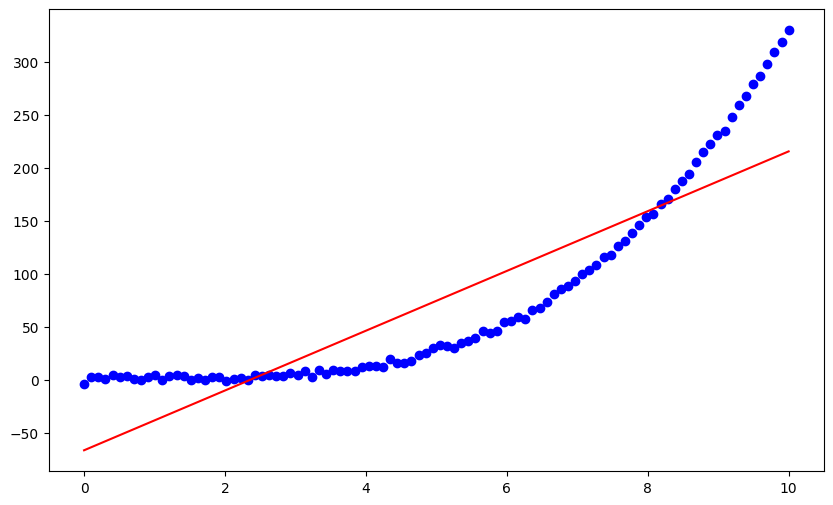

In [18]:
## plot the results
plt.figure(figsize=(10,6))
plt.scatter(X,y_true,label="Data point", c="b")
plt.plot(X,y_pred,label='Linear Regression prediction on non-linear data',c='r')

#### Different type of transformations

In [19]:
x = np.linspace(0,10,100)
y_log = np.log(x+1)     # logarithmic function
y_exp = np.exp(x)       # Exponential function
y_square = x**2         # Square function
y_cube = x**3           # cube function

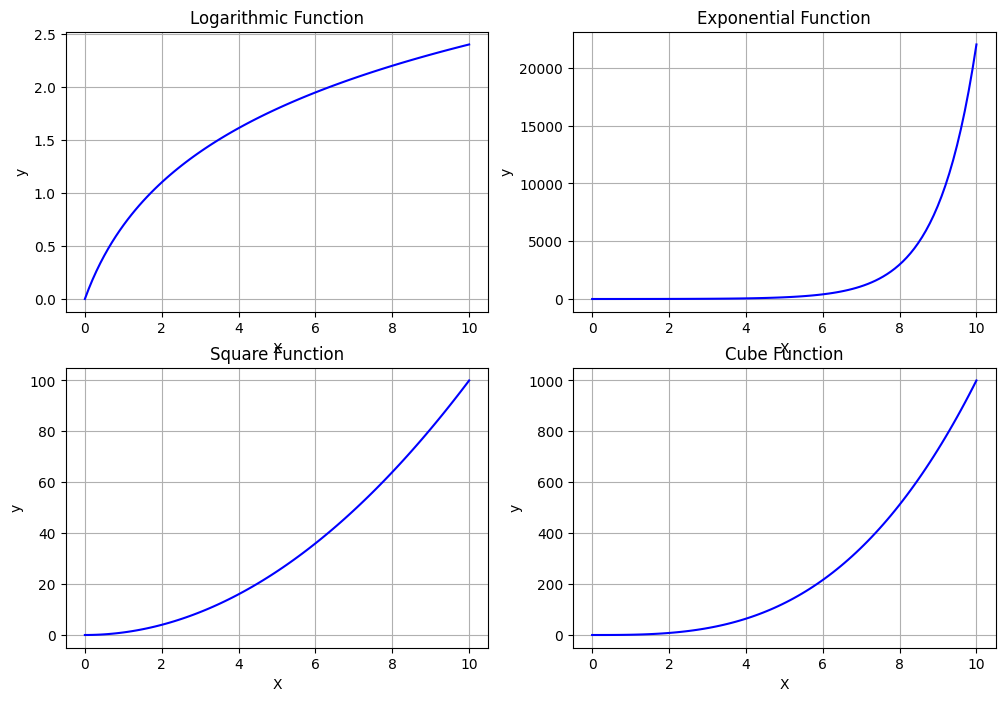

In [21]:
# plot these mathmetical functions
plt.figure (figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(x,y_log,label='Logarithmic function',c='b')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Logarithmic Function')
plt.grid(True)


plt.subplot(2,2,2)
plt.plot(x,y_exp,label='Exponential function',c='b')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Exponential Function')
plt.grid(True)


plt.subplot(2,2,3)
plt.plot(x,y_square,label='Square function',c='b')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Square Function')
plt.grid(True)


plt.subplot(2,2,4)
plt.plot(x,y_cube,label='Cube function',c='b')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Cube Function')
plt.grid(True)

#### Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
## create polynomial feature
poly = PolynomialFeatures(degree=2)
X_poly_square = poly.fit_transform(X.reshape(-1,1))

In [25]:
# fit the linear regression model on the polynomial features
model_polynomial_feature_square = LinearRegression()
model_polynomial_feature_square.fit(X_poly_square,y_true)
# prediction of linear regression model
y_pred = model_polynomial_feature_square.predict(X_poly_square)

In [26]:
# calculate the mean squared Error
mse = mean_squared_error(y_true,y_pred)

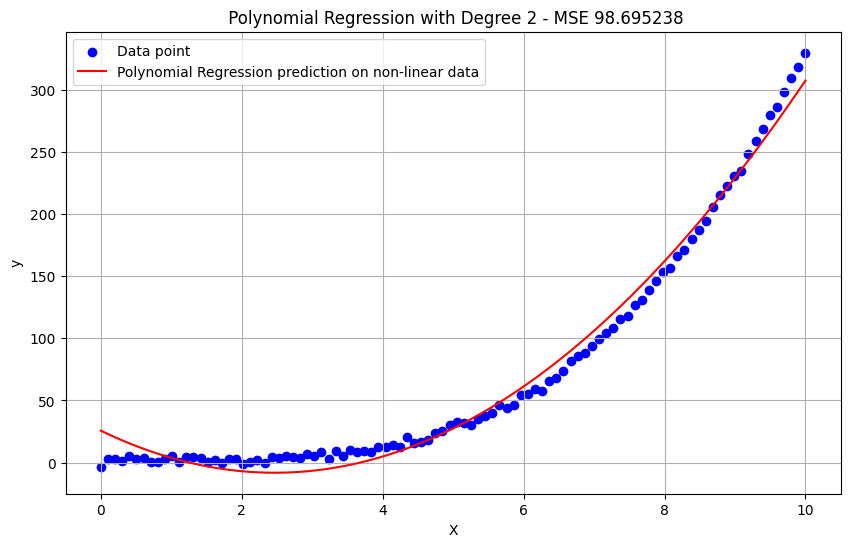

In [27]:
## plot the results
plt.figure(figsize=(10,6))
plt.scatter(X,y_true,label="Data point", c="b")
plt.plot(X,y_pred,label='Polynomial Regression prediction on non-linear data',c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f' Polynomial Regression with Degree 2 - MSE {mse:2f}')
plt.grid(True)
plt.legend()
plt.show()

##### Polynomial regression with degree 3

In [28]:
## create polynomial feature
poly = PolynomialFeatures(degree=3)
X_poly_cube = poly.fit_transform(X.reshape(-1,1))

In [29]:
# fit the linear regression model on the polynomial features
model_polynomial_feature_cube = LinearRegression()
model_polynomial_feature_cube.fit(X_poly_cube,y_true)
# prediction of linear regression model
y_pred = model_polynomial_feature_cube.predict(X_poly_cube)

In [30]:
# calculate the mean squared Error
mse = mean_squared_error(y_true,y_pred)

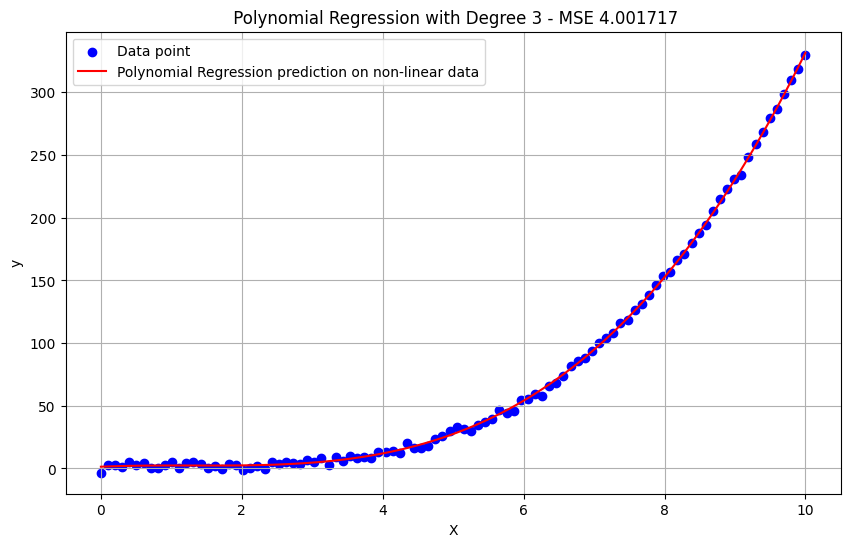

In [31]:
## plot the results
plt.figure(figsize=(10,6))
plt.scatter(X,y_true,label="Data point", c="b")
plt.plot(X,y_pred,label='Polynomial Regression prediction on non-linear data',c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f' Polynomial Regression with Degree 3 - MSE {mse:2f}')
plt.grid(True)
plt.legend()
plt.show()

#### How we can regularised in case overfitting

##### Experiment with Lasso

In [34]:
from sklearn.linear_model import Lasso

In [39]:
## create polynomial feature
poly = PolynomialFeatures(degree=3)
X_poly_cube = poly.fit_transform(X.reshape(-1,1))

In [98]:
# fit the lasso regression on polynomial feature
lasso_model_polynomial_feature = Lasso(alpha=50000)
lasso_model_polynomial_feature.fit(X_poly_cube,y_true)

# prediction on lasso regression
y_pred = lasso_model_polynomial_feature.predict(X_poly_cube)

In [99]:
lasso_model_polynomial_feature.coef_

array([0., 0., 0., 0.])

In [88]:
# calculate the mean squared Error
mse = mean_squared_error(y_true,y_pred)

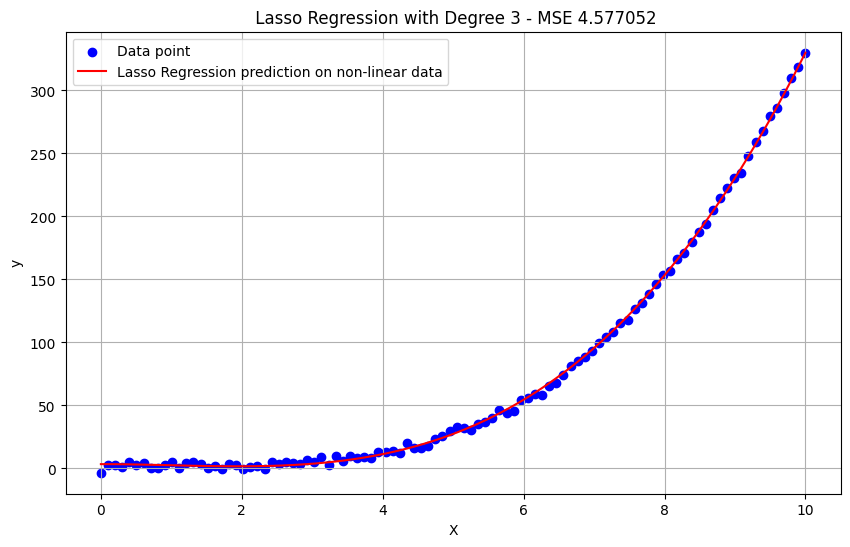

In [89]:
## plot the results
plt.figure(figsize=(10,6))
plt.scatter(X,y_true,label="Data point", c="b")
plt.plot(X,y_pred,label='Lasso Regression prediction on non-linear data',c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f' Lasso Regression with Degree 3 - MSE {mse:2f}')
plt.grid(True)
plt.legend()
plt.show()

##### Experiment with Ridge

In [59]:
from sklearn.linear_model import Ridge

In [114]:
# fit the lasso regression on polynomial feature
Ridge_model_polynomial_feature = Ridge(alpha=100000000)
Ridge_model_polynomial_feature.fit(X_poly_cube,y_true)

# prediction on lasso regression
y_pred = Ridge_model_polynomial_feature.predict(X_poly_cube)

In [115]:
Ridge_model_polynomial_feature.coef_

array([0.        , 0.0002204 , 0.00250395, 0.02458179])

In [82]:
# calculate the mean squared Error
mse = mean_squared_error(y_true,y_pred)

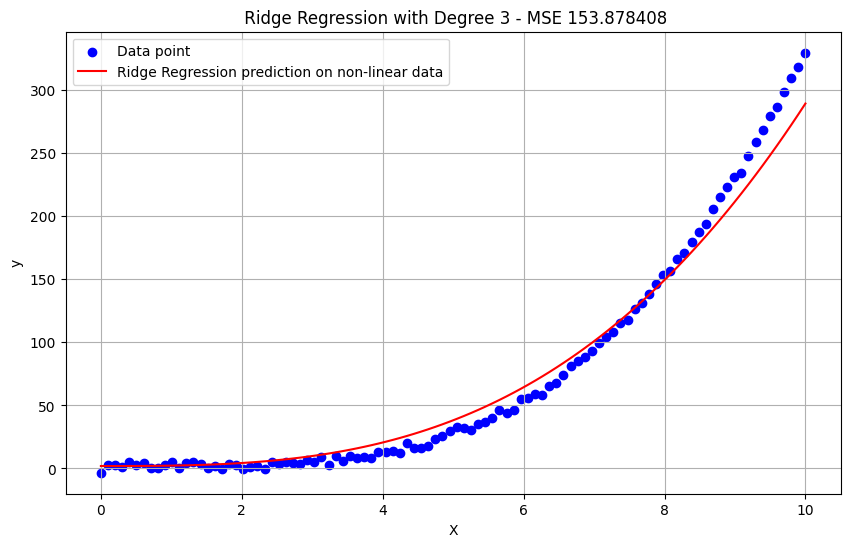

In [83]:
## plot the results
plt.figure(figsize=(10,6))
plt.scatter(X,y_true,label="Data point", c="b")
plt.plot(X,y_pred,label='Ridge Regression prediction on non-linear data',c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f' Ridge Regression with Degree 3 - MSE {mse:2f}')
plt.grid(True)
plt.legend()
plt.show()